Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [2]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **kanunum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [ ]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğu ekrana yazdırılacaktır.

In [ ]:
print(df.groupby('kategori').size())

kategori
Cumhurbaşkanlığı Kararnamesi     54
Genelge                         385
Kanun                           514
Kanun Hükmünde Kararname         91
Komisyon Raporu                 500
Resmi Gazete                    546
Tebliğ                          623
Tüzük                            82
Yönetmelik                      597
Özelge                          750
dtype: int64


Yukarıdaki bulgular doğrultusunda örnek bir kaydın 'data_text' verisini yazıdırıp, **belge türü** ile ilgili bilgi içerip içermediğini görmek için kategori alanındaki veriyi de ekrana yazdıralım.

In [ ]:
satir = 3604
print('Kategori:',df['kategori'][satir],'\n',35*'-','\nİçerik:',df['data_text'][satir],sep='')

Özelge olarak kategori edilen toplam 750 adet kayıt vardı. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturup veriyi burada analiz etmek ve analizimizin sonucunu mevcut 750 kayıttan kaçında doğru sonuç verdiğini kontrol etmek yöntemimizin doğruluğu hakkında bize bilgi verecektir.

In [ ]:
# Özelge için kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulOzelge(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında  olan "T.C.", "Gelir" veya "GELİR" ifadelerinden biri varsa o bir Özelge'dir önermesini kontrol ediyoruz!
  if  verilenMetin.find('T.C.') != -1  or verilenMetin.find('Gelir') != -1 or verilenMetin.find('GELİR') != -1 :
    return 'Özelge'
  # Başlık içinde arama yapan alternatif yöntemler de denenebilir!!!

# 750 kayıt arasında kaç tanesinin Özelge olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece Özelge kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Özelge':
    continue

  arastirilacakParca = df['data_text'][satir]
  if kategoriBulOzelge(arastirilacakParca)!=df['kategori'][satir]:
    hataSayisi+=1
    print(satir)

print(hataSayisi)

Özelge kategorisinde bulduğumuz yöntemin 2 hata ile çalıştığını gördük. Karmaşıklık matrisi ile bu yöntemimizin ne kadar doğru çalıştığını Özelge kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
# Özelge için kategori bulmak amacıyla kullanılan fonksiyonumuz
def kategoriBulOzelge(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
   # data_text alanındaki kayıdın ilk parçasında  olan "T.C.", "Gelir" veya "GELİR" ifadelerinden biri varsa o bir Özelge'dir önermesini kontrol ediyoruz!
  if  verilenMetin.find('T.C.') != -1  or verilenMetin.find('Gelir') != -1 or verilenMetin.find('GELİR') != -1 :
    return 'Özelge'
  else:
    return 'Özelge Değil'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

# Sadece Özelge kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):

  arastirilacakParca = df['data_text'][satir]
  fonksiyonumuzunCiktisi = kategoriBulOzelge(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Özelge' and df['kategori'][satir]=='Özelge':
    # Fonksiyonumuz Özelge olan kategoriyi Özelge olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Özelge Değil' and df['kategori'][satir]=='Özelge':
    # Fonksiyonumuz Özelge olan kategoriyi Özelge olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Özelge' and df['kategori'][satir]!='Özelge':
    # Fonksiyonumuz Özelge olmayan kategoriyi Özelge olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Özelge olmayan kategoriyi Özelge olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Accuracy:',(TP + TN) / satirToplami)
print('Precision:',TP / (TP+FP) )
print('Sensitivity (Recall):',TP / (TP+FN) )
print('Specificity:',TN / (TN+FP) )
print('F-score (F1 Skore):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

Bulunan TP, TN, FP ve FN değerlerine göre Karmaşıklık Matrisi görselleştirilecektir.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

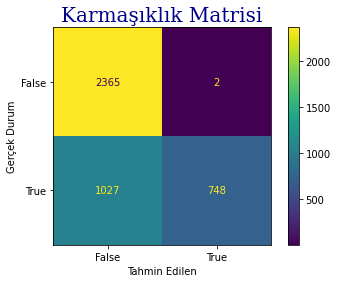

In [41]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline


karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulTuzuk** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.,

- 748 Özelge belgesini Özelge belgesi olarak tespit etmiştir.
- 2 Özelge belgesini Özelge belgesi olarak tespit edememiştir.
- 1027 Özelge belgesi olmayan belgeyi Özelge olarak tespit etmiştir.
- 2365 Özelge belgesi olmayan belgeyi de Özelge belgesi olmayan belge olarak tespit etmiştir.
- Kural bazlı yöntemimiz için hesaplamalar aşağıdaki gibi olmuştur.
  - **Doğruluk (Accuracy):** 0.751569290197972
  - **Keskinlik (Precision):** 0.42140845070422533
  - **Hassasiyet (Sensitivity) / Duyarlılık (Recall):** 0.9973333333333333
  - **Özgüllük (Specificity):** 0.6972287735849056
  - **F1-Puanı (F1 Score):** 0.751422687731069



